In [1]:
import numpy as np
from scipy.stats import binned_statistic
from tqdm import tqdm, trange
import seaborn
import matplotlib.pyplot as plt
import os

In [137]:
curr_run_fname = '/oak/stanford/orgs/kipac/aemulus/aemulus_nu/Box_n50_49_1400/'
rockstar_dir = curr_run_fname+'output/rockstar/'

In [138]:
f = open(rockstar_dir+'savelist.txt', 'r')
savelist = f.read().split()
f.close()

N_snapshots = len(savelist)

0it [00:00, ?it/s]/tmp/ipykernel_165075/3051003674.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(bin_cnters[not0], N[not0]/vol, c=color,
16it [00:44,  2.79s/it]


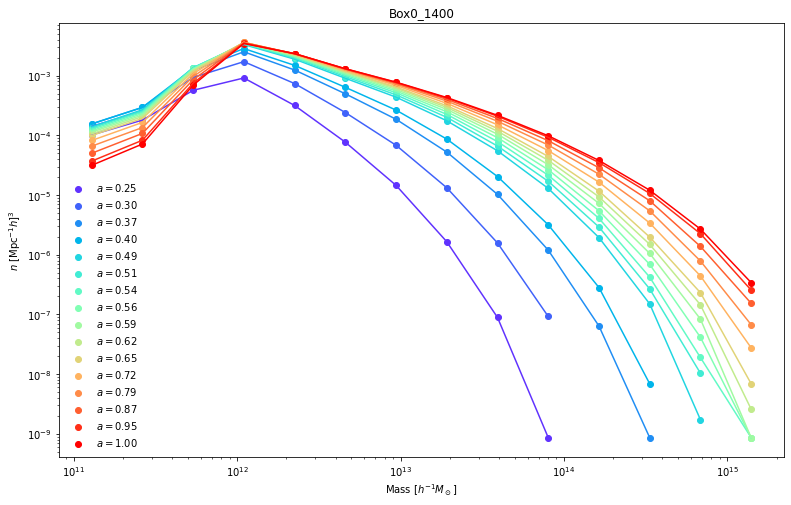

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,8))
i=0

f = open('/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/'+curr_run_fname.split('/')[-2]+'_M200b', 'r')
for line in tqdm(f):
    snapshot_mass = line.strip().split()
    snapshot_mass = np.array(snapshot_mass, dtype=np.float64)
    
    f = open(rockstar_dir+'out_%d.list'%(i), 'r')
    
    vol = -1
    a = -1
    
    for line in f:
        if('#a' in line):
            a = eval(line.split()[2])
        if('Box size' in line):
            vol = eval(line.split()[2])**3
            break
    
    nBins = 15
    edges = np.logspace(np.log10(.9e11), np.log10(2e15), nBins, 10.)
    color = plt.colormaps["rainbow"]((i+1)/N_snapshots)
    N, bin_edge, bin_idx = binned_statistic(snapshot_mass, np.ones_like(snapshot_mass), 
                                            statistic='count', bins=edges)
    bin_cnters = np.array([np.sqrt(bin_edge[i]*bin_edge[i+1]) for i in range(len(bin_edge)-1)])
    
    not0 = np.where(N>0)
    ax.plot(bin_cnters[not0], N[not0]/vol, c=color)
    ax.scatter(bin_cnters[not0], N[not0]/vol, c=color,
              label=r'$a=%.2f$'%(a))
    i+=1
f.close()
ax.set_title(curr_run_fname.split('/')[-2])
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Mass $[h^{-1}M_\odot]$')
ax.set_ylabel(r'$n$ $[{\rm Mpc}^{-1}h]^3$')
ax.legend(frameon=False)
plt.savefig('figures/'+curr_run_fname.split('/')[-2]+'_nvsM.pdf', bbox_inches='tight')

Let $N$ be the number of halos in a certain bin with width $\Delta M$

$$N = \frac{dn}{dM}\times \Delta M \times V$$

So we have that 

$$\frac {dn}{dM} = \frac N {\Delta M \times V}$$

0it [00:00, ?it/s]/tmp/ipykernel_165075/3940610148.py:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(bin_cnters[not0], dndM, c=color,
16it [00:41,  2.58s/it]


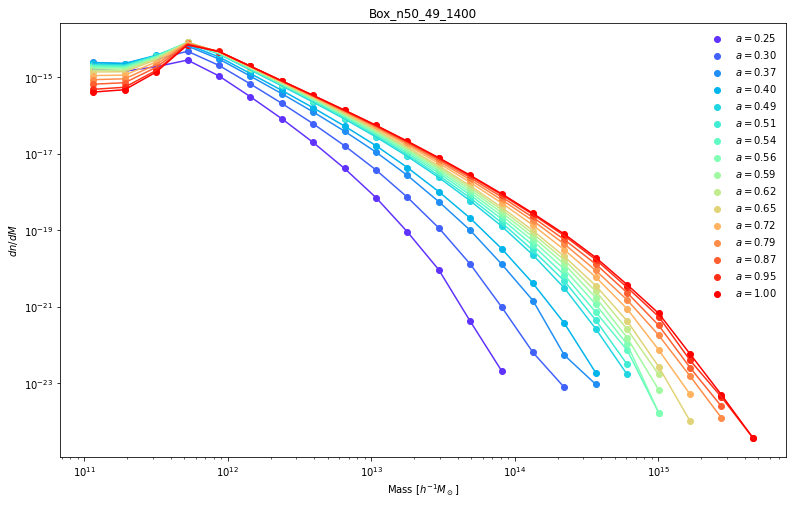

In [140]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,8))
i=0

import pickle

dndMs = {}
f = open('/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/'+curr_run_fname.split('/')[-2]+'_M200b', 'r')
for line in tqdm(f):
    snapshot_mass = line.strip().split()
    snapshot_mass = np.array(snapshot_mass, dtype=np.float64)    
    f = open(rockstar_dir+'out_%d.list'%(i), 'r')
    
    vol = -1
    a = -1
    
    for line in f:
        if('#a' in line):
            a = eval(line.split()[2])
        if('Box size' in line):
            vol = eval(line.split()[2])**3
            break
    
    nBins = 30
    edges = np.logspace(np.log10(.9e11), np.log10(2e17), nBins, 10.)
    color = plt.colormaps["rainbow"]((i+1)/N_snapshots)
    N, bin_edge, bin_idx = binned_statistic(snapshot_mass, np.ones_like(snapshot_mass), 
                                            statistic='count', bins=edges)
    bin_cnters = np.array([np.sqrt(bin_edge[i]*bin_edge[i+1]) for i in range(len(bin_edge)-1)])
    dM = np.array([(bin_edge[i+1]-bin_edge[i]) for i in range(len(bin_edge)-1)])
    
    not0 = np.where(N>0)
    
    dndM = (N[not0]/vol)/dM[not0]

    ax.plot(bin_cnters[not0], dndM, c=color)
    ax.scatter(bin_cnters[not0], dndM, c=color,
              label=r'$a=%.2f$'%(a))
    i+=1
    dndMs[a] = {'M':bin_cnters[not0], 'dndM':dndM}
f.close()
ax.set_title(curr_run_fname.split('/')[-2])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'Mass $[h^{-1}M_\odot]$')
ax.set_ylabel(r'$dn/dM$')
ax.legend(frameon=False)

plt.savefig('figures/'+curr_run_fname.split('/')[-2]+'_dndM.pdf', bbox_inches='tight')

dndM_fname = '/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/'+curr_run_fname.split('/')[-2]+'_dndM.pkl'
dndM_f = open(dndM_fname, 'wb')
pickle.dump(dndMs, dndM_f)
dndM_f.close()